# Анализ программы лояльности

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

#### Цель проекта:
Оценить эффективность программы лояльности.

#### Задачи проекта:
1. Провести исследовательский анализ;
2. Определить ритейл-метрики и расчитать их;
3. Провести анализ эффективности программы лояльности;
4. Проверить гипотезы;
5. Сделать выводы и дать рекомендации.

#### План анализа:

1. Загрузка и изучение данных:
    * Загрузить данные;
    * Изучить данные;
    * Сделать вывод и определить план предобработки данных.
2. Предобработка данных:
    * Объединить таблицы в одну;
    * Привести названия столбцов к общепринятому виду;
    * Проверить данные на дубликаты (явные и неявные);
    * Проверить данные на пропуски;
    * Обработать пропуски или сделать вывод об отсутствии необходимости их обработки;
    * Проверить типы данных и при необходимости привести к другим типам;
    * Проверить данные на аномалии;
    * Добавить поле "Месяц покупки";
    * Добавить поле "Сумма покупки", которое будет хранить произведение полей "Стоимость одной единицы товара" и "Кол-во товара".
3. Исследовательский анализ данных:
    * Изучить распределение количества покупок во времени в разрезе категории лояльности;
    * Изучить распределение количества покупателей во времени в разрезе категории лояльности;
    * Изучить в каких магазинах сети больше всего продаж.
4. Проверка эффективности программы лояльности:  
В качестве метрик для расчета будут использоваться **средний чек, среднее количество покупок, LTV**. *Будем считать программу лояльности эффективной, если 2 и 3 метрик будут положительны.*
    * Расчитать средний чек в разрезе категории лояльности;
    * Расчитать среднее количество покупок в разрезе категории лояльности;
    * Расчитать LTV в разрезе категории лояльности;
    * Сделать вывод об эффективности программы лояльности.
5. Проверка гипотез:
    * Проверить гипотезу "*Средний чек участников программы лояльности  выше, чем у остальных покупателей*";
    * Проверить гипотезу "*Участники программы лояльности совершают больше покупок в месяц, чем остальные покупатели*".
6. Выводы и рекомендации:
    * Сделать подробный вывод об эффективности программы лояльности;
    * Дать рекомендации заказчику;
    * Подготовить презентацию заказчику;
    * Подготовить дашборд для коммерческого департамента, содержащий:
        * гистограмму, отображающую количество покупок на покупателей;
        * диаграмму, отображающую соотношение количества покупок по различным магазинам;
        * фильтр по дате совершения покупки.
    
*в разрезе программы лояльности - расчитать отдельно для участников программы лояльности и остальных покупателей.

### Загрузка и изучение данных

Для начала импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Загрузим данные:

In [2]:
try:
    data = pd.read_csv('/datasets/retail_dataset.csv') # откроем файл,
    product_data = pd.read_csv('/datasets/product_codes.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/retail_dataset.csv') # если не удалось, возьмем данные с сайта
    product_data = pd.read_csv('https://code.s3.yandex.net/datasets/product_codes.csv')

Изучим первые 20 строк каждого датафрейма:

In [3]:
data.head(20)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0
5,538379,22965,0,2016-12-12 11:26:00,22805.0,Shop 0,1.0
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0.0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0.0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0.0
9,539501,22372,0,2016-12-20 11:08:00,22764.0,Shop 0,1.0


In [4]:
product_data.head(20)

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
5,22752,7.65
6,21730,4.25
7,22633,1.85
8,22632,1.85
9,84879,1.69


Изучим информацию о данных:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [6]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


Проверим за какой отрезок времени присутствуют данные:

In [7]:
data['purchasedate'].min()

'2016-12-01 08:26:00'

In [8]:
data['purchasedate'].max()

'2017-02-28 17:04:00'

В данных присутствуют записи о 105335 покупках за 3 месяца.

Данные нуждаются в предобработке. Для начала нужно объединить таблицы, привести названия столбцов к общепринятому виду, проверить данные на дубликаты и пропуски. Займемся этим на этапе предобработки.

### Предобработка данных

Для начала проверим данные на дубликаты. Посчитаем кол-во явных дубликатов в таблице data.

In [9]:
data.duplicated().sum()

1033

Найдено 1033 явных дубликата, удалять их не нужно, т.к. по условию может быть несколько одинаковых продаж.

Посчитаем кол-во явных дубликатов в таблице product_data.

In [10]:
product_data.duplicated().sum()

0

In [11]:
product_data.sort_values('productID').head(20)

,productID,price_per_one
31,10002,0.85
8122,10002,1.63
2459,10002,1.66
9886,10080,0.85
2432,10120,0.21
2431,10123C,0.65
3623,10124A,0.42
2098,10124G,0.42
4901,10125,0.42
3542,10125,1.66


В данных есть записи с одним и тем же id товара, но разной ценой. Оставим только одну строку для каждого товара, со средней ценой.

In [12]:
product_data = product_data.groupby('productID')['price_per_one'].median().reset_index()
product_data.head()

,productID,price_per_one
0,10002,1.63
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


Объединим таблицы в одну.

In [13]:
data = data.merge(product_data, how='left', left_on='item_ID', right_on='productID')
data = data[['purchaseid', 'item_ID', 'Quantity', 'purchasedate', 'CustomerID', 'ShopID', 'loyalty_program', 'price_per_one']]
data.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,1.63
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0,3.29
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0,1.63
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0,4.37
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0,5.75


Приведем названия столбцов к общепринятому виду:

In [14]:
data = data.rename(columns={
    'purchaseid': 'purchase_id', 
    'item_ID': 'item_id', 
    'Quantity': 'quantity', 
    'purchasedate': 'purchase_date',
    'CustomerID': 'customer_id',
    'ShopID': 'shop_id',
})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105335 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_id      105335 non-null  object 
 1   item_id          105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchase_date    105335 non-null  object 
 4   customer_id      69125 non-null   float64
 5   shop_id          105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
 7   price_per_one    105335 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.2+ MB


Проверим данные на пропуски:

In [15]:
data.isna().sum()

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36210
shop_id                0
loyalty_program        0
price_per_one          0
dtype: int64

У нас есть 36148 строк, где не заполнено поле `customer_id`. Посмотрим являются ли эти покупатели участниками программы лояльности.

In [16]:
data_isna = data[data['customer_id'].isna()]
data_isna_loy = data_isna[data_isna['loyalty_program']==0.0]
data_isna_loy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36210 entries, 6 to 105330
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchase_id      36210 non-null  object 
 1   item_id          36210 non-null  object 
 2   quantity         36210 non-null  int64  
 3   purchase_date    36210 non-null  object 
 4   customer_id      0 non-null      float64
 5   shop_id          36210 non-null  object 
 6   loyalty_program  36210 non-null  float64
 7   price_per_one    36210 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.5+ MB


Посмотрим в каких магазинах есть пропущенные значения.

In [17]:
data_isna['shop_id'].unique()

array(['Shop 0', 'Shop 25', 'Shop 6', 'Shop 21', 'Shop 23'], dtype=object)

Все покупатели с пропущенными id не являются участниками программы лояльности и пропуски наблюдаются только в 5 магазинах. Возможно, это не постоянные покупатели, а покупатели "с улицы" и о них нет данных.

In [18]:
data = data.fillna(-1)
data.isna().sum()

purchase_id        0
item_id            0
quantity           0
purchase_date      0
customer_id        0
shop_id            0
loyalty_program    0
price_per_one      0
dtype: int64

Приведем типы данных к корректным:
1. Поля `customer_id`, `loyalty_program` приведем к типу `int`.
2. Поле `purchase_date` приведем к типу `datetime`.

В полях `purchase_id`, `item_id` есть id, содержащие буквы. Возможно, это ошибки, но точно утверждать нельзя, поэтому оставим их без изменения.

In [19]:
data['customer_id'] = data['customer_id'].astype('int')
data['loyalty_program'] = data['loyalty_program'].astype('int')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105335 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_id      105335 non-null  object 
 1   item_id          105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchase_date    105335 non-null  object 
 4   customer_id      105335 non-null  int32  
 5   shop_id          105335 non-null  object 
 6   loyalty_program  105335 non-null  int32  
 7   price_per_one    105335 non-null  float64
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 6.4+ MB


In [20]:
data['purchase_date'] = pd.to_datetime(data['purchase_date'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,1.63
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,3.29
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,1.63
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,4.37
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,5.75


Проверим данные на аномалии:

In [21]:
data['shop_id'].unique()

array(['Shop 0', 'Shop 1', 'Shop 4', 'Shop 6', 'Shop 2', 'Shop 11',
       'Shop 3', 'Shop 5', 'Shop 7', 'Shop 12', 'Shop 8', 'Shop 27',
       'Shop 10', 'Shop 20', 'Shop 19', 'Shop 25', 'Shop 14', 'Shop 21',
       'Shop 18', 'Shop 9', 'Shop 16', 'Shop 28', 'Shop 29', 'Shop 17',
       'Shop 22', 'Shop 13', 'Shop 26', 'Shop 24', 'Shop 15', 'Shop 23',
       'Shop 30'], dtype=object)

In [22]:
data['loyalty_program'].unique()

array([0, 1])

In [23]:
data['quantity'].describe()

count    105335.000000
mean          7.821218
std         327.946695
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: quantity, dtype: float64

В поле `quantity` присутствуют отрицательные значения. Скорее всего это ошибки в данных. Приведем их к положительным значениям.
Также присуствуют нулевые значения, возможно, это ошибки, вызванные заменой кассовых апаратов, но точно утверждать нельзя. Пока оставим такие значения без изменения.

In [24]:
data['quantity'] = abs(data['quantity'])
data['quantity'].describe()

count    105335.000000
mean         10.093245
std         327.884632
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max       74216.000000
Name: quantity, dtype: float64

Максимальное значение 74216 товаров за одну покупку. Посмотрим распределение количества товаров на графике.

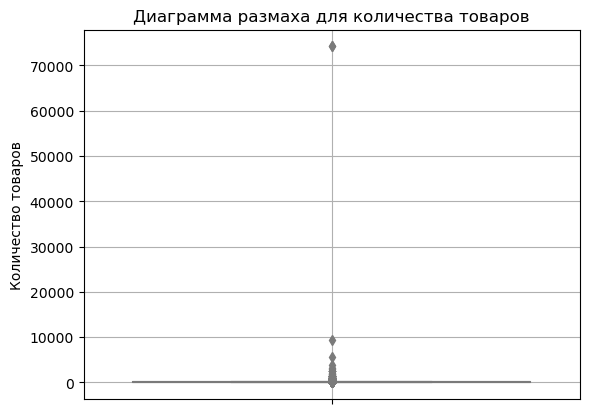

In [25]:
sns.boxplot(data=data, y='quantity', palette='pastel')

plt.title('Диаграмма размаха для количества товаров')
plt.ylabel('Количество товаров')
plt.grid(True)

Посмотрим сколько строк с количеством товаров больше 9000.

In [26]:
data[data['quantity'] > 9000].count()

purchase_id        3
item_id            3
quantity           3
purchase_date      3
customer_id        3
shop_id            3
loyalty_program    3
price_per_one      3
dtype: int64

Нашлось 3 записи с количеством товаров больше 9000. Удалим их.

In [27]:
data = data[data['quantity'] < 9000]
data['quantity'].describe()

count    105332.000000
mean          8.595498
std          46.102064
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max        5567.000000
Name: quantity, dtype: float64

Максимальное значение все равно довольно большое в сравнении со средним. Построим диаграмму размаха еще раз.

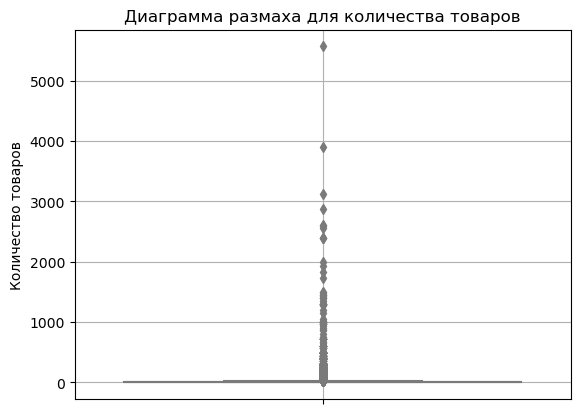

In [28]:
sns.boxplot(data=data, y='quantity', palette='pastel')

plt.title('Диаграмма размаха для количества товаров')
plt.ylabel('Количество товаров')
plt.grid(True)

Посмотрим сколько строк с количеством товаров больше 1500.

In [29]:
data[data['quantity'] > 1500].count()

purchase_id        14
item_id            14
quantity           14
purchase_date      14
customer_id        14
shop_id            14
loyalty_program    14
price_per_one      14
dtype: int64

Нашлось 14 записей с количеством товаров больше 1500. Удалим их.

In [30]:
data = data[data['quantity'] < 1500]

Посмотрим на распределение данных по датам.

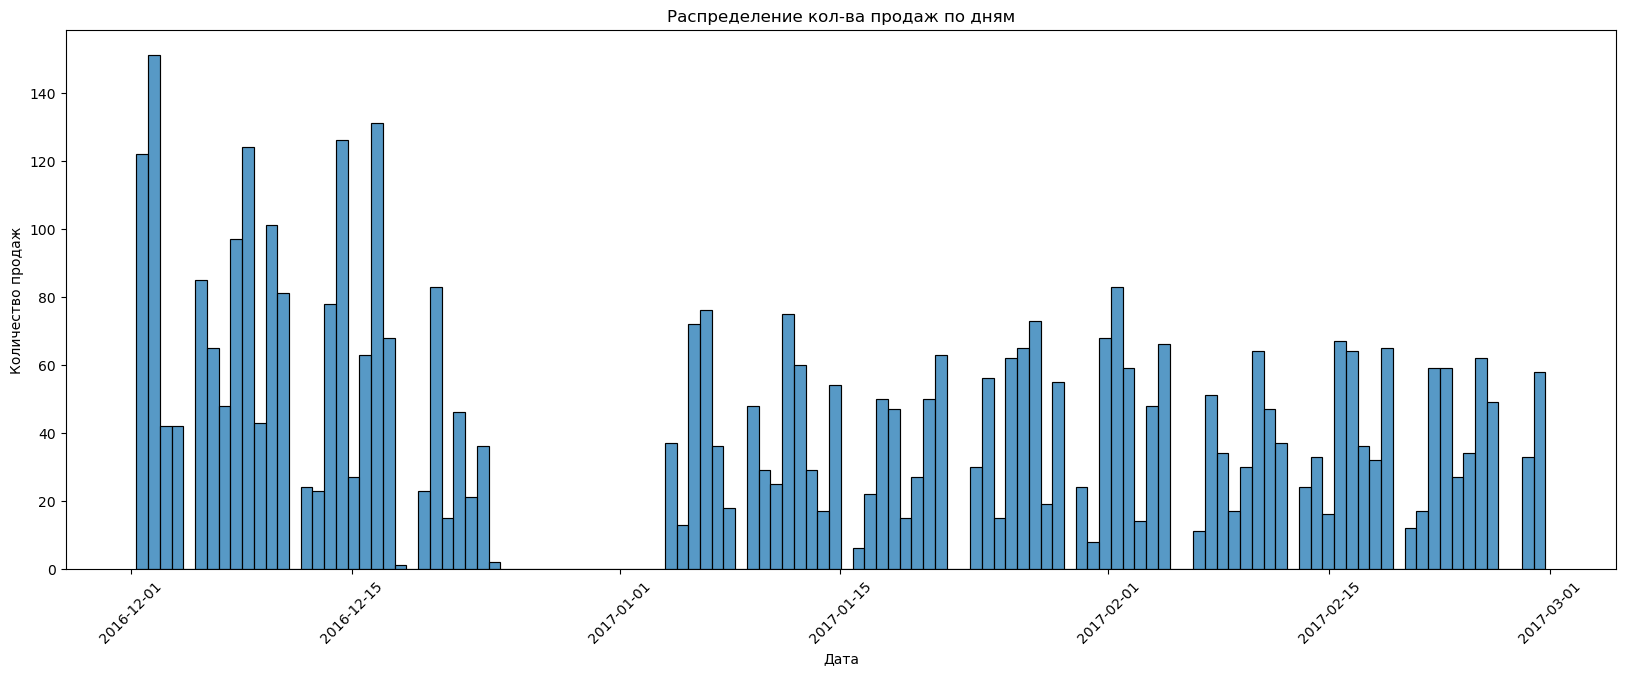

In [31]:
date_purchases = data.groupby(data['purchase_date'])['purchase_id'].nunique()

plt.figure(figsize=(20, 7))
sns.histplot(data=date_purchases , x='purchase_date', bins=120)
plt.title('Распределение кол-ва продаж по дням')
plt.ylabel('Количество продаж')
plt.xlabel('Дата')
plt.xticks(rotation=45);

Судя по графику, больше всего продаж было перед новым годом. В новогодние праздники продаж не было совсем, скорее всего магазин не работал. Дальше данные распределены примерно равномерно.

Добавим поле "Месяц покупки".

In [32]:
data['month'] = data['purchase_date'].dt.strftime('%Y-%m')
data.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,month
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,1.63,2016-12
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,3.29,2016-12
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,1.63,2016-12
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,4.37,2017-02
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,5.75,2017-02


Добавить поле "Сумма покупки", которое будет хранить произведение полей "Стоимость одной единицы товара" и "Кол-во товара".

In [33]:
data['sum'] = data['quantity'] * data['price_per_one']
data.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,month,sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,1.63,2016-12,17.93
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,3.29,2016-12,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,1.63,2016-12,11.41
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,4.37,2017-02,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,5.75,2017-02,0.00


На этом этап предобработки завершен. Таблицы были объединены в одну, выполнена проверка на дубликаты, обработаны пропущенные и аномальные значения. Добавлены новые поля "Месяц покупки" и "Сумма покупки".

### Исследовательский анализ данных

Для начала изучим распределение количества покупок во времени в разрезе категории лояльности.

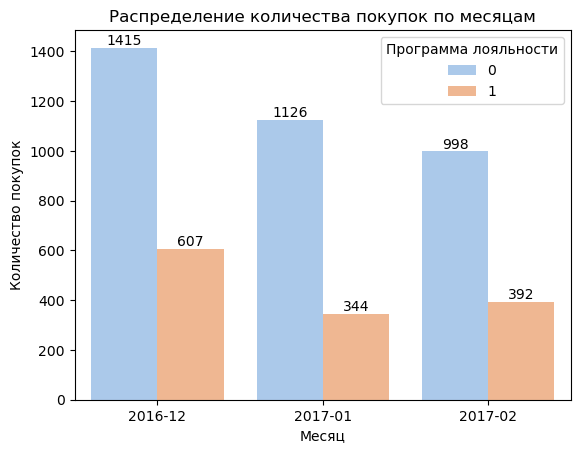

In [34]:
data_month = data.groupby(by=['month', 'loyalty_program'], as_index=False)['purchase_id'].nunique().sort_values(by='purchase_id', ascending=False)

ax = sns.barplot(x='month', y='purchase_id', hue='loyalty_program', data=data_month, palette='pastel')

plt.legend(title='Программа лояльности')
ax.set_title('Распределение количества покупок по месяцам')
ax.set_ylabel('Количество покупок')
ax.set_xlabel('Месяц')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

По графику видно, что и для участников программы лояльности, и для обычных покупателей больше всего заказов было в декабре, а меньше всего в январе.

Изучим распределение количества покупателей во времени в разрезе категории лояльности

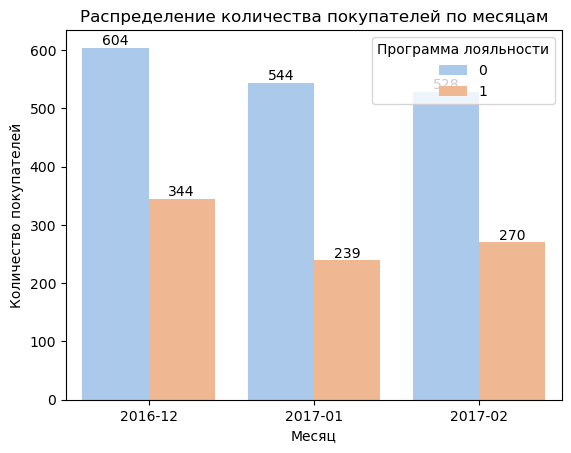

In [35]:
data_customer = data.groupby(by=['month', 'loyalty_program'], as_index=False)['customer_id'].nunique()

ax = sns.barplot(x='month', y='customer_id', hue='loyalty_program', data = data_customer, palette='pastel')

plt.legend(title='Программа лояльности')
ax.set_title('Распределение количества покупателей по месяцам')
ax.set_ylabel('Количество покупателей')
ax.set_xlabel('Месяц')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

И участников программы лояльности, и для обычных покупателей больше всего было в декабре, а в январе и феврале примерно одинаковое количество.

Изучим в каких магазинах сети больше всего продаж.

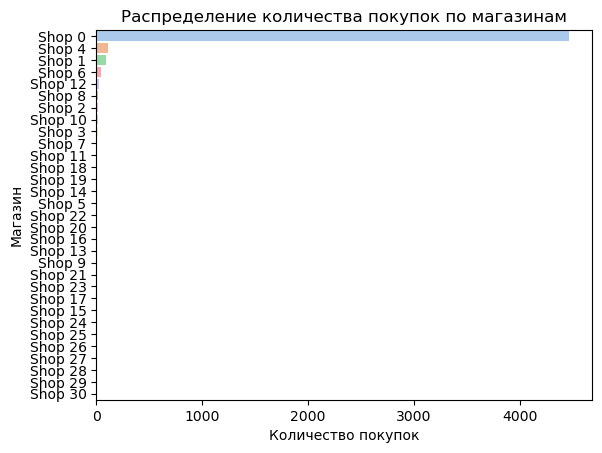

In [36]:
data_shop = data.groupby(by=['shop_id'], as_index=False)['purchase_id'].nunique()
data_shop = data_shop.sort_values(by='purchase_id', ascending=False)
data_shop
ax = sns.barplot(x='purchase_id', y='shop_id', data = data_shop, palette='pastel')

ax.set_title('Распределение количества покупок по магазинам')
ax.set_xlabel('Количество покупок')
ax.set_ylabel('Магазин');
#ax.bar_label(ax.containers[0]);

Судя по графику все основные продажи приходятся только на один магазин - Shop 0, это выглядит несколько странно.

### Анализ эффективности программы лояльности

Для начала посчитаем средний чек для обычных клиентов и клиентов, которые участвуют в программе лояльности.

Для этого разделим покупателей на две группы - участников программы лояльности и обычных покупателей.

In [37]:
data_true = data[data['loyalty_program']==1]
data_true.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,month,sum
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,3.290,2016-12,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,1.630,2016-12,11.41
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,4.370,2017-02,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,5.750,2017-02,0.00
5,538379,22965,0,2016-12-12 11:26:00,22805,Shop 0,1,3.115,2016-12,0.00


In [38]:
data_false = data[data['loyalty_program']==0]
data_false.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,month,sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,1.63,2016-12,17.93
6,540468,22189,0,2017-01-07 13:55:00,-1,Shop 0,0,3.95,2017-01,0.00
7,541424,79321,1,2017-01-17 17:57:00,-1,Shop 0,0,5.75,2017-01,5.75
8,538883,22891,0,2016-12-14 15:56:00,-1,Shop 0,0,6.27,2016-12,0.00
11,541696,22197,4,2017-01-20 18:08:00,-1,Shop 0,0,1.24,2017-01,4.96


Посчитаем средний чек для участников программы лояльности. Для начала напишем функцию расчета среднего чека.

In [39]:
def mean_check(data):
    # посчитаем общую сумму каждой покупки
    data_check = data.groupby('purchase_id', as_index=False)['sum'].sum()
    data_check = data_check[data_check['sum']!=0] # отбросим некорректные данные с нулевой суммой покупки
    data_check = data_check['sum'].median() # посчитаем общую среднюю сумму покупки
    return data_check

Посчитаем средний чек и отобразим результаты на графике.

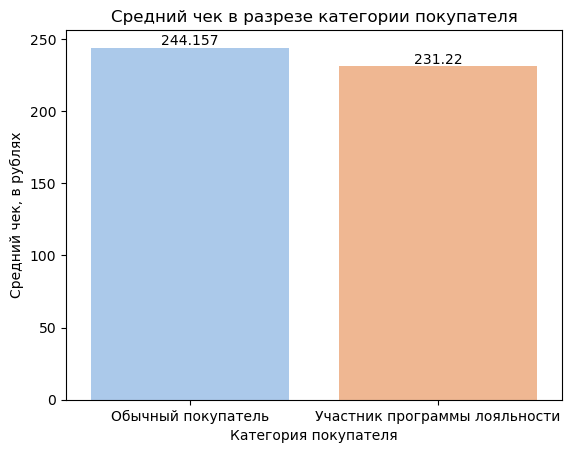

In [40]:
data_check_true = mean_check(data_true)
data_check_false = mean_check(data_false)

ax = sns.barplot(
    y=[data_check_false, data_check_true], 
    x=['Обычный покупатель', 'Участник программы лояльности'], 
    palette='pastel')

ax.set_title('Средний чек в разрезе категории покупателя')
ax.set_xlabel('Категория покупателя')
ax.set_ylabel('Средний чек, в рублях')
ax.bar_label(ax.containers[0]);

Из графика следует, что средний чек участников программы лояльности немного ниже, чем у обычных покупателей. 

Проверим среднее количество покупок в месяц на одного покупателя. Напишем функцию для расчета:

In [41]:
def count_purchases(data):
    # посчитаем общее кол-во покупок в месяц для каждого покупателя
    data_purchase = data.groupby(by=['month', 'customer_id'], as_index=False)['purchase_id'].nunique()
    data_purchase = data_purchase[data_purchase['customer_id']!=-1] # отбросим данные с неизвестным покупателем
    data_purchase = data_purchase['purchase_id'].mean() # посчитаем общее среднее кол-во покупок
    return data_purchase

Отобразим результаты расчетов на графике.

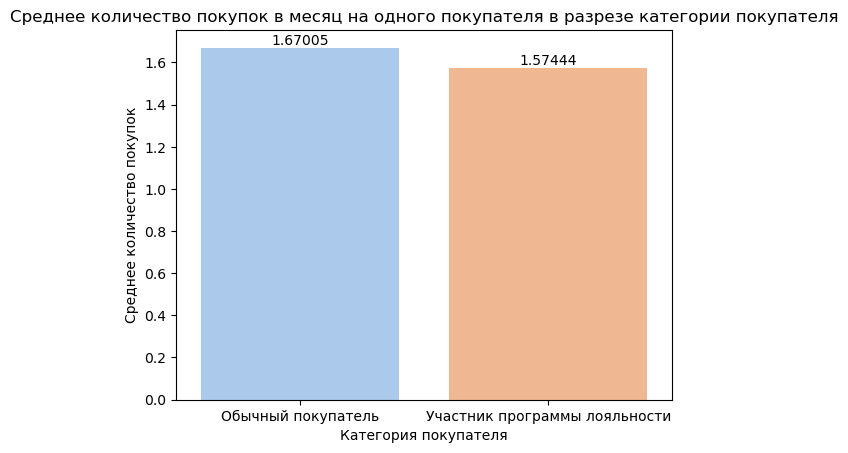

In [42]:
data_purchase_true = count_purchases(data_true)
data_purchase_false = count_purchases(data_false)

ax = sns.barplot(
    y=[data_purchase_false, data_purchase_true], 
    x=['Обычный покупатель', 'Участник программы лояльности'], 
    palette='pastel')

ax.set_title('Среднее количество покупок в месяц на одного покупателя в разрезе категории покупателя')
ax.set_xlabel('Категория покупателя')
ax.set_ylabel('Среднее количество покупок')
ax.bar_label(ax.containers[0]);

Участники программы лояльности совершают в среднем немного меньше покупок в месяц, чем обычные покупатели. 

Посчитаем LTV. Для этого напишем функцию подсчета общей выручки каждого покупателя и возьмём среднее.

In [43]:
def get_ltv(data):
    # посчитаем общую выручку с каждого покупателя
    data_ltv = data.groupby('customer_id', as_index=False)['sum'].sum()
    data_ltv = data_ltv[data_ltv['customer_id']!=-1] # отбросим данные с неизвестным покупателем
    data_ltv = data_ltv['sum'].median() # найдем общую среднюю выручку
    return data_ltv

Посмотрим результаты на графике.

In [44]:
data_ltv_true = data_true.groupby('customer_id', as_index=False)['sum'].sum()
data_ltv_true = data_ltv_true[data_ltv_true['customer_id']!=-1] # отбросим данные с неизвестным покупателем

# подсчитаем кол-во месяцев жизни покупателя
count_month = data_true.groupby('customer_id', as_index=False)['month'].nunique()
# объединим таблицы и добавим оплату за пользование программой лояльности
data_ltv_true = data_ltv_true.merge(count_month, how='left', left_on='customer_id', right_on='customer_id')
data_ltv_true['sum'] = data_ltv_true['sum'] + 200 * data_ltv_true['month']

data_ltv_true = data_ltv_true['sum'].median() # найдем общую среднюю выручку

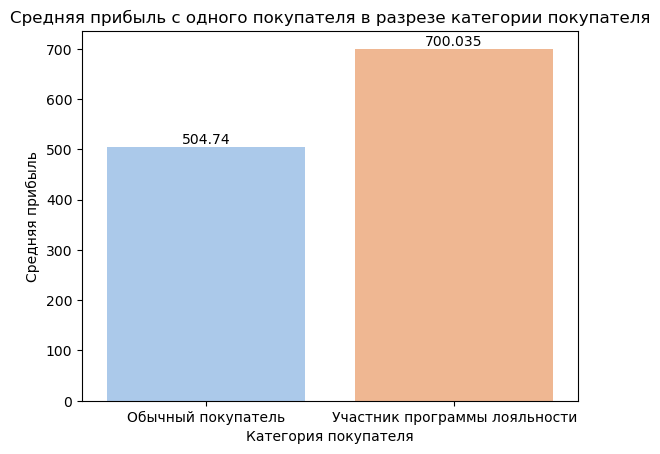

In [45]:
data_ltv_false = get_ltv(data_false)

ax = sns.barplot(
    y=[data_ltv_false, data_ltv_true], 
    x=['Обычный покупатель', 'Участник программы лояльности'], 
    palette='pastel')

ax.set_title('Средняя прибыль с одного покупателя в разрезе категории покупателя')
ax.set_xlabel('Категория покупателя')
ax.set_ylabel('Средняя прибыль')
ax.bar_label(ax.containers[0]);

Обычные покупатели в среднем приносят чуть меньше денег, чем покупатели, участвующие в программе лояльности. И чем дольше покупатели будут пользоваться программой лояльности, тем больше будет их LTV.

Учитывая все расчеты, можно сделать вывод, что у программы лояльности есть потенциал к развитию, показатели участников программы лояльности или примерно такие же, как у обычных покупателей, или чуть меньше. Но LTV участников программы лояльности будет постоянно увеличиваться.

### Проверка гипотез

Проверим средующие гипотезы:
1. Средний чек участников программы лояльности  выше, чем у остальных покупателей;
2. Участники программы лояльности совершают больше покупок в месяц, чем остальные покупатели.

*Проверим первую гипотезу.*  
Н0: Средний чек участников программы лояльности и обычных покупателей одинаковый.  
H1: Средний чек участников программы лояльности выше, чем у остальных покупателей.

Для начала подготовим нужные данные.

In [46]:
check_true = data_true.groupby('purchase_id', as_index=False)['sum'].sum()
check_true = check_true[check_true['sum']!=0] # отбросим некорректные данные с нулевой суммой покупки

check_false = data_false.groupby('purchase_id', as_index=False)['sum'].sum()
check_false = check_false[check_false['sum']!=0] # отбросим некорректные данные с нулевой суммой покупки

Проверим данные на нормальность:

In [47]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(check_true['sum'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [48]:
check_true['sum'].describe()

count     1330.000000
mean       455.151936
std       1106.698178
min          1.250000
25%         96.781250
50%        231.220000
75%        482.670000
max      23093.560000
Name: sum, dtype: float64

In [49]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(check_false['sum'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [50]:
check_false['sum'].describe()

count     3336.000000
mean       578.920087
std       1443.738328
min          0.390000
25%         73.656250
50%        244.157500
75%        549.955000
max      26374.580000
Name: sum, dtype: float64

Распределение не нормально, в данных присутствуют выбросы, значит для проверки гипотезы нужно использовать критерий Манна-Уитни.

Проверим гипотезы:

In [51]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(check_true['sum'], check_false['sum'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print('Средний чек участников программы лояльности составляет', check_true['sum'].median())
print('Средний чек обычных покупателей составляет', check_false['sum'].median())

p-значение:  0.4740162947868247
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Средний чек участников программы лояльности составляет 231.22
Средний чек обычных покупателей составляет 244.1575


*Проверим вторую гипотезу.*  
H0: Участники программы лояльности совершают столько же покупок в месяц, сколько и обычные покупатели.  
H1: Участники программы лояльности совершают больше покупок в месяц, чем обычные покупатели.

Подготовим данные.

In [52]:
purchase_true = data_true.groupby(by=['month', 'customer_id'], as_index=False)['purchase_id'].count()
purchase_true = purchase_true[purchase_true['customer_id']!=-1] # отбросим данные с неизвестным покупателем
purchase_true = purchase_true.groupby('month', as_index=False)['purchase_id'].median()
purchase_true

,month,purchase_id
0,2016-12,18.0
1,2017-01,21.0
2,2017-02,19.0


Проверим распределение на нормальность:

In [53]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(purchase_true['purchase_id'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.6368856430053711
Не получилось отвергнуть нулевую гипотезу, всё нормально


In [54]:
purchase_false = data_false.groupby(by=['month', 'customer_id'], as_index=False)['purchase_id'].count()
purchase_false = purchase_false[purchase_false['customer_id']!=-1] # отбросим данные с неизвестным покупателем
purchase_false = purchase_false.groupby('month', as_index=False)['purchase_id'].median()
purchase_false

,month,purchase_id
0,2016-12,17.0
1,2017-01,19.0
2,2017-02,16.0


Проверим распределение на нормальность:

In [55]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(purchase_false['purchase_id'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.6368856430053711
Не получилось отвергнуть нулевую гипотезу, всё нормально


Распределение нормально. Поэтому для проверки гипотезы можно использовать ttest.

Проверим гипотезы:

In [56]:
alpha = 0.05 # зададим порог отбрасывания нулевой гипотезы

# подсчитаем вероятность того, что нулевая гипотеза может быть верна
results = st.ttest_ind(purchase_true['purchase_id'], purchase_false['purchase_id'], alternative='greater')

print('p-значение:', results.pvalue)

# сравним полученное значение с пороговым
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть основания полагать, что участник программы лояльности совершают больше покупок в месяц, чем обычные покупатели')
else:
    print('Не получилось отвергнуть нулевую гипотезу: возможно, участники программы лояльности совершают примерно столько же покупок в месяц, сколько и обычные покупатели')
    
print('Среднее количество покупок в месяц на участника программы лояльности состаляет', data_purchase_true)
print('Среднее количество покупок в месяц на обычного покупателя состаляет', data_purchase_false)

p-значение: 0.09203701597528845
Не получилось отвергнуть нулевую гипотезу: возможно, участники программы лояльности совершают примерно столько же покупок в месяц, сколько и обычные покупатели
Среднее количество покупок в месяц на участника программы лояльности состаляет 1.574443141852286
Среднее количество покупок в месяц на обычного покупателя состаляет 1.6700537955768082


### Выводы и рекомендации:

Целью данного проекта являлась оценка эффективности программы лояльности.

На этапе предобработки данных были преобразованы типы данных, удалены дубликаты, обработаны пропуски и выполнена проверка на неявные дубликаты.

Далее изучили полученные данные и сделали промежуточные выводы:
1. И для участников программы лояльности, и для обычных покупателей больше всего заказов было в декабре, а меньше всего в январе. В январе очень много выходных, поэтому, возможно именно этим вызвано малое количество заказов. А в декабре сезонные покупки к новому году.
2. И участников программы лояльности, и обычных покупателей больше всего было в декабре, а в январе и феврале примерно одинаковое количество.
3. Все основные продажи приходятся только на один магазин - Shop 0. Это выглядит довольно странно и, возможно, вызвано ошибкой в данных.

Далее были расчитаны ритейл метрики. По результатам расчетов можно сделать следующие выводы:
1. Средний чек участников программы лояльности чуть ниже, чем у обычных покупателей.
2. Участники программы лояльности совершают в среднем чуть меньше покупок в месяц, чем обычные покупатели.
3. Участники программы лояльности, в среднем, приносят чуть больше денег, чем обычные покупатели. И их LTV с каждым месяцем будет только увеличиваться.

Далее были подготовлены данные для проверки гипотез. При проверке гипотез были получены следующие результаты:
1. Средний чек участников программы лояльности впримерно такой же, как у остальных покупателей. Разница в среднем чеке не является статистической значимой.
2. Участники программы лояльности совершают примерно столько же покупок в месяц, сколько и обычные покупатели. Разница в среднем количестве покупок также не является статистически значимой.

Из всего вышеперечисленного, можно сформировать итоговый вывод:

**Программа лояльности неэффективна, но имеет потенциал к развитию**. Показатели участников программы лояльности чуть ниже или примерно такие же, чем у остальных покупателей. Но с каждым месяцем их LTV будет расти, поэтому программа имеет потенциал.

В качестве рекомендаций можно посоветовать следующее:
1. Запустить накопительную бонусную программу, что заставляло бы покупателей заходить именно в этот магазин и совершать больше покупок.
2. Разобраться с корректностью данных по продажам в филиалах магазина. Возможно при увеличении продаж в других магазинах, показатели эффективности изменятся, т.к. датасет, в основном, содержит данные только по одному филиалу.
3. Увеличить временной промежуток времени, за который проводится анализ эффективности.

Презентация: https://disk.yandex.ru/i/JKCo0YgwOKrZeA  
Дашборд: https://public.tableau.com/views/_16961753320280/sheet2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link